# Title
By Steven & Allison

Mod 1 Project: Draft

### Table of Contents###

1. <a href='TheProblemStatement'>The Problem Statement </a>
2. <a href='selection'>Data Sources</a>
3. <a href ='clean'>Data Cleaning</a>
4. <a href = 'expanding'>Expanding the Dataset</a>

<a id='TheProblemStatement'></a>
### The Problem Statement ###

 - Context ...
 - We define "successful" films using the metric of return on investment (ROI), calculated as gross income less production budget.
 - We selected ROI over, for example, gross profit, because it would account for the effects of inflation. 

##### Import Libraries

In [373]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

<a id='selection'></a>
### Data Sources

Our primary data source is from TheNumbers.com and contains information on release dates, domestic and worldwide gross income, and production budgets--the figures we need to calculate ROI. 

In [374]:
movies_df = pd.read_csv('./data/tn.movie_budgets.csv.gz')

In [375]:
movies_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [376]:
movies_df.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


In [377]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.1+ KB


In [378]:
movies_df.shape

(5782, 6)

<a id = 'clean' ></a>
### Data Cleaning

We followed the following steps to clean the dataset:
 - Check for null values
 - Check for duplicate values
 - Change 'release date' to a date-time object
 - Change monetary figures from strings to integers

The dataframe does not appear to contain any explicitly null values. 

In [379]:
movies_df.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [380]:
movies_df[movies_df.duplicated(subset = 'id')]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
100,1,"May 29, 2009",Up,"$175,000,000","$293,004,164","$731,463,377"
101,2,"Nov 22, 2017",Coco,"$175,000,000","$209,726,015","$798,008,101"
102,3,"Nov 21, 2018",Ralph Breaks The Internet,"$175,000,000","$201,091,711","$524,283,695"
103,4,"Mar 27, 2009",Monsters vs. Aliens,"$175,000,000","$198,351,526","$381,687,380"
104,5,"Jun 16, 2017",Cars 3,"$175,000,000","$152,901,115","$383,541,369"
105,6,"Aug 7, 2009",G.I. Joe: The Rise of Cobra,"$175,000,000","$150,201,498","$302,469,017"
106,7,"Jun 30, 1999",Wild Wild West,"$175,000,000","$113,805,681","$221,229,335"
107,8,"Aug 1, 2008",The Mummy: Tomb of the Dragon Emperor,"$175,000,000","$102,491,776","$405,760,225"
108,9,"Jun 22, 2007",Evan Almighty,"$175,000,000","$100,289,690","$174,131,329"
109,10,"Jul 28, 1995",Waterworld,"$175,000,000","$88,246,220","$264,246,220"


In [381]:
# drop id column
movies_df = movies_df.drop(columns = 'id')

Change release_date to datetime object

In [382]:
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])

In [383]:
# Sort by datetime
movies_df.sort_values(by='release_date').tail(39)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
5037,2019-04-23,Living Dark: The Story of Ted the Caver,"$1,750,000",$0,$0
1305,2019-05-03,UglyDolls,"$45,000,000","$19,894,664","$24,644,664"
3915,2019-05-03,El Chicano,"$8,000,000","$700,261","$700,261"
3871,2019-05-03,The Intruder,"$8,000,000","$35,095,904","$36,005,871"
1474,2019-05-03,Long Shot,"$40,000,000","$30,202,860","$43,711,031"
2325,2019-05-10,The Professor and the Madman,"$25,000,000",$0,"$5,227,233"
175,2019-05-10,PokÃ©mon: Detective Pikachu,"$150,000,000","$139,507,806","$411,258,433"
3795,2019-05-17,The Sun is Also a Star,"$9,000,000","$4,950,029","$5,434,029"
1380,2019-05-17,John Wick: Chapter 3 â Parabellum,"$40,000,000","$141,744,320","$256,498,033"
80,2019-05-24,Aladdin,"$182,000,000","$246,734,314","$619,234,314"


In [384]:
# sort movies by release date
movies_df = movies_df.sort_values(by = 'release_date')

In [385]:
movies_df.reset_index()

,index,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,5677,1915-02-08,The Birth of a Nation,"$110,000","$10,000,000","$11,000,000"
1,5523,1916-09-05,Intolerance,"$385,907",$0,$0
2,5614,1916-12-24,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5683,1920-09-17,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5606,1925-11-19,The Big Parade,"$245,000","$11,000,000","$22,000,000"
5,4569,1925-12-30,Ben-Hur: A Tale of the Christ,"$3,900,000","$9,000,000","$9,000,000"
6,4984,1927-08-12,Wings,"$2,000,000",$0,$0
7,5524,1929-02-01,The Broadway Melody,"$379,000","$2,800,000","$4,358,000"
8,4559,1930-11-15,Hell's Angels,"$4,000,000",$0,$0
9,5423,1931-12-26,Mata Hari,"$558,000","$900,000","$900,000"


In [386]:
movies_df = movies_df.drop(movies_df.tail(39).index)

In [387]:
movies_df.tail()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
4132,2019-03-29,Unplanned,"$6,000,000","$18,107,621","$18,107,621"
496,2019-04-05,Shazam!,"$85,000,000","$139,606,856","$362,899,733"
2460,2019-04-05,Pet Sematary,"$21,000,000","$54,724,696","$109,501,146"
3633,2019-04-05,The Best of Enemies,"$10,000,000","$10,205,616","$10,205,616"
1176,2019-04-12,Hellboy,"$50,000,000","$21,903,748","$40,725,492"


In [388]:
movies_df[movies_df['worldwide_gross']=='$0']

,release_date,movie,production_budget,domestic_gross,worldwide_gross
5523,1916-09-05,Intolerance,"$385,907",$0,$0
4984,1927-08-12,Wings,"$2,000,000",$0,$0
4559,1930-11-15,Hell's Angels,"$4,000,000",$0,$0
5180,1936-10-20,The Charge of the Light Brigade,"$1,200,000",$0,$0
5154,1941-10-28,How Green Was My Valley,"$1,250,000",$0,$0
4759,1951-07-28,Alice in Wonderland,"$3,000,000",$0,$0
5061,1955-08-05,The Kingâs Thief,"$1,577,000",$0,$0
4797,1956-01-12,Diane,"$2,660,000",$0,$0
5535,1957-04-13,12 Angry Men,"$340,000",$0,$0
5713,1962-08-10,The Brain That Wouldn't Die,"$60,000",$0,$0


In [389]:
# idea - create subset of 0s for second analysis on what not to do. (only if time!)

Change str obj to integers 

In [390]:
movies_df['production_budget'] = movies_df['production_budget'].str.replace(',','')
movies_df['production_budget'] = movies_df['production_budget'].str.replace('$', '')
movies_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
5677,1915-02-08,The Birth of a Nation,110000,"$10,000,000","$11,000,000"
5523,1916-09-05,Intolerance,385907,$0,$0
5614,1916-12-24,"20,000 Leagues Under the Sea",200000,"$8,000,000","$8,000,000"
5683,1920-09-17,Over the Hill to the Poorhouse,100000,"$3,000,000","$3,000,000"
5606,1925-11-19,The Big Parade,245000,"$11,000,000","$22,000,000"


In [391]:
movies_df['domestic_gross'] = movies_df['domestic_gross'].str.replace(',','')
movies_df['domestic_gross'] = movies_df['domestic_gross'].str.replace('$', '')
movies_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
5677,1915-02-08,The Birth of a Nation,110000,10000000,"$11,000,000"
5523,1916-09-05,Intolerance,385907,0,$0
5614,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,"$8,000,000"
5683,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,"$3,000,000"
5606,1925-11-19,The Big Parade,245000,11000000,"$22,000,000"


In [392]:
movies_df['worldwide_gross'] = movies_df['worldwide_gross'].str.replace(',','')
movies_df['worldwide_gross'] = movies_df['worldwide_gross'].str.replace('$', '')
movies_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
5677,1915-02-08,The Birth of a Nation,110000,10000000,11000000
5523,1916-09-05,Intolerance,385907,0,0
5614,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
5683,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
5606,1925-11-19,The Big Parade,245000,11000000,22000000


In [393]:
movies_df['production_budget'] = movies_df['production_budget'].astype(int)

In [394]:
movies_df['worldwide_gross'] = movies_df['worldwide_gross'].astype('int64')

In [395]:
movies_df['domestic_gross'] = movies_df['domestic_gross'].astype(int)

In [396]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5743 entries, 5677 to 1176
Data columns (total 5 columns):
release_date         5743 non-null datetime64[ns]
movie                5743 non-null object
production_budget    5743 non-null int32
domestic_gross       5743 non-null int32
worldwide_gross      5743 non-null int64
dtypes: datetime64[ns](1), int32(2), int64(1), object(1)
memory usage: 224.3+ KB


In [397]:
# Check assumption that domestic figures are included in worldwide
movies_df[(movies_df['domestic_gross'] > movies_df['worldwide_gross'])]

,release_date,movie,production_budget,domestic_gross,worldwide_gross


**Assumption: Domestic Gross is included in Worldwide Gross figures**

In [398]:
#Make an ROI column

In [399]:
movies_df['roi'] = movies_df['worldwide_gross'] / movies_df['production_budget']

In [400]:
movies_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,roi
5677,1915-02-08,The Birth of a Nation,110000,10000000,11000000,100.000000
5523,1916-09-05,Intolerance,385907,0,0,0.000000
5614,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,40.000000
5683,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,30.000000
5606,1925-11-19,The Big Parade,245000,11000000,22000000,89.795918


In [401]:
movies_df = movies_df.sort_values(by = 'roi', ascending = False)

In [402]:
movies_df.reset_index()

,index,release_date,movie,production_budget,domestic_gross,worldwide_gross,roi
0,5745,1972-06-30,Deep Throat,25000,45000000,45000000,1800.000000
1,5613,1980-03-21,Mad Max,200000,8750000,99750000,498.750000
2,5492,2009-09-25,Paranormal Activity,450000,107918810,194183034,431.517853
3,5679,2015-07-10,The Gallows,100000,22764410,41656474,416.564740
4,5406,1999-07-14,The Blair Witch Project,600000,140539099,248300000,413.833333
5,5709,2004-05-07,Super Size Me,65000,11529368,22233808,342.058585
6,5346,1942-08-13,Bambi,858000,102797000,268000000,312.354312
7,5773,1993-02-26,El Mariachi,7000,2040920,2041928,291.704000
8,5676,1968-10-01,Night of the Living Dead,114000,12087064,30087064,263.921614
9,5210,1976-11-21,Rocky,1000000,117235147,225000000,225.000000


In [403]:
movies_df.drop('domestic_gross', axis = 1, inplace = True)

In [404]:
movies_df.head()

,release_date,movie,production_budget,worldwide_gross,roi
5745,1972-06-30,Deep Throat,25000,45000000,1800.000000
5613,1980-03-21,Mad Max,200000,99750000,498.750000
5492,2009-09-25,Paranormal Activity,450000,194183034,431.517853
5679,2015-07-10,The Gallows,100000,41656474,416.564740
5406,1999-07-14,The Blair Witch Project,600000,248300000,413.833333


In [405]:
# Create a second feature
movies_df['net_revenue'] = movies_df['worldwide_gross'] - movies_df['production_budget']

<a id="expanding"> </a>
### Expanding the Dataset

In [406]:
# Find info on studio / producer
studio_df = pd.read_csv('./data/bom.movie_gross.csv.gz')
studio_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [407]:
# Clean up this dataset - keep domestic and foreign in case helps add to missing data in other set. 
studio_df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [408]:
studio_df.shape

(3387, 5)

In [409]:
studio_df[studio_df['title'].duplicated()]

,title,studio,domestic_gross,foreign_gross,year
3045,Bluebeard,WGUSA,43100.0,NaN,2017


In [415]:
studio_df[studio_df['title'] == 'Bluebeard'] #these aren't actually duplicates

,title,studio,domestic_gross,foreign_gross,year
317,Bluebeard,Strand,33500.0,5200,2010
3045,Bluebeard,WGUSA,43100.0,NaN,2017


In [416]:
movies_df['year'] = movies_df['release_date'].dt.year

In [417]:
movies_df['year'] = movies_df['year'].astype(str)

In [418]:
# remane column so can merge
movies_df.rename(columns = {'movie': 'title'}, inplace = True)

In [419]:
# make new column in movies + year
movies_df['title_year'] = movies_df['title'] + ' ' + movies_df['year']

In [420]:
studio_df['year'] = studio_df['year'].astype(str)

In [421]:
studio_df['title_year'] = studio_df['title'] + ' ' + studio_df['year']

In [422]:
merged_df = movies_df.merge(studio_df, on = 'title_year', how = 'inner')

In [423]:
#One duplicate - which we deleted completely because no money.
merged_df[merged_df['title_year'].duplicated()]

,release_date,title_x,production_budget,worldwide_gross,roi,net_revenue,year_x,title_year,title_y,studio,domestic_gross,foreign_gross,year_y


In [424]:
merged_df = merged_df[merged_df['title_year'] != 'Home 2009']

In [425]:
merged_df.head()

,release_date,title_x,production_budget,worldwide_gross,roi,net_revenue,year_x,title_year,title_y,studio,domestic_gross,foreign_gross,year_y
0,2015-07-10,The Gallows,100000,41656474,416.564740,41556474,2015,The Gallows 2015,The Gallows,WB (NL),22800000.0,20200000,2015
1,2012-01-06,The Devil Inside,1000000,101759490,101.759490,100759490,2012,The Devil Inside 2012,The Devil Inside,Par.,53300000.0,48500000,2012
2,2011-04-01,Insidious,1500000,99870886,66.580591,98370886,2011,Insidious 2011,Insidious,FD,54000000.0,43000000,2011
3,2015-04-17,Unfriended,1000000,64364198,64.364198,63364198,2015,Unfriended 2015,Unfriended,Uni.,32500000.0,31600000,2015
4,2010-10-20,Paranormal Activity 2,3000000,177512032,59.170677,174512032,2010,Paranormal Activity 2 2010,Paranormal Activity 2,Par.,84800000.0,92800000,2010


In [426]:
merged_df.shape

(1215, 13)

In [427]:
# No added info from studio dataset on $ numbers, so we will drop those columns
merged_df[(merged_df['worldwide_gross'] == 0) & (merged_df['foreign_gross'] != -99)]

,release_date,title_x,production_budget,worldwide_gross,roi,net_revenue,year_x,title_year,title_y,studio,domestic_gross,foreign_gross,year_y


In [428]:
merged_df = merged_df.drop(['title_y', 'year_y'], axis = 1)
merged_df = merged_df.drop(['year_x', 'title_x'], axis = 1)

In [429]:
merged_df = merged_df.drop(['domestic_gross', 'foreign_gross'], axis = 1)

In [430]:
merged_df.head()

,release_date,production_budget,worldwide_gross,roi,net_revenue,title_year,studio
0,2015-07-10,100000,41656474,416.564740,41556474,The Gallows 2015,WB (NL)
1,2012-01-06,1000000,101759490,101.759490,100759490,The Devil Inside 2012,Par.
2,2011-04-01,1500000,99870886,66.580591,98370886,Insidious 2011,FD
3,2015-04-17,1000000,64364198,64.364198,63364198,Unfriended 2015,Uni.
4,2010-10-20,3000000,177512032,59.170677,174512032,Paranormal Activity 2 2010,Par.


In [441]:
merged_df = merged_df.sort_values(by = 'roi', ascending = False)

In [443]:
merged_df.shape

(1215, 7)

The dataset is much smaller after the inner join. The movies span release years from 2010 to 2018.

In [450]:
merged_df['release_date'].dt.year.value_counts()

2010    180
2011    161
2015    142
2012    141
2016    138
2013    137
2014    124
2017     99
2018     93
Name: release_date, dtype: int64

### Categorizing Studio Size

We segment studios into three categories: small, medium, and large. The categories are based on budget averaged across years 2010-2018. 
More info on studios in dataset here: https://www.boxofficemojo.com/studio/?view2=allstudios&view=company&p=.htm

In [451]:
merged_df['studio'].nunique()

96

We used the available data to estimate studio size based on their production budgets for the movies in our dataset. 

In [479]:
size = merged_df.groupby(['studio'])['production_budget'].sum()

In [480]:
size = pd.DataFrame(size)

In [482]:
size.head()

,production_budget
studio,
3D,5000000.0
A24,143100000.0
ATO,12500000.0
Affirm,7000000.0
Alc,10000000.0


In [506]:
#SIZE BUCKETS: length = 
# 12/11 = large, 10 = medium, 9/8 = small

In [488]:
size['production_budget'] = size['production_budget'].astype(str)

In [497]:
size['studio_size'] = size['production_budget'].map(lambda x: len(x))

In [511]:
size['studio_size'].replace([12, 11, 10, 9, 8], ["Large", "Large", "Medium", "Small", "Small"], inplace = True)

In [512]:
final_df = merged_df.merge(size, on = 'studio', how = 'inner')

In [514]:
final_df.drop(['production_budget_y', 'studio_size_x'], axis = 1, inplace = True)

In [517]:
final_df['studio_size_y'].value_counts()

Large     1085
Medium      97
Small       32
Name: studio_size_y, dtype: int64

In [518]:
final_df.head()

,release_date,production_budget_x,worldwide_gross,roi,net_revenue,title_year,studio,studio_size_y
0,2015-07-10,100000,41656474,416.564740,41556474,The Gallows 2015,WB (NL),Large
1,2014-10-03,6500000,256862920,39.517372,250362920,Annabelle 2014,WB (NL),Large
2,2016-07-22,5000000,148806510,29.761302,143806510,Lights Out 2016,WB (NL),Large
3,2017-08-11,15000000,305384865,20.358991,290384865,Annabelle: Creation 2017,WB (NL),Large
4,2017-09-08,35000000,697457969,19.927371,662457969,It 2017,WB (NL),Large


# Questions - Future Steps 
 - More accurate data on production budgets / studio size

 - Genres
 - Production budget range 
 - Popularity (some kind of metric) / review ratings
 - Independent or major studio
     - Range of ROI
 - How do sequels perform in comparison to originals?
 - Season of release
 - Actors ? 


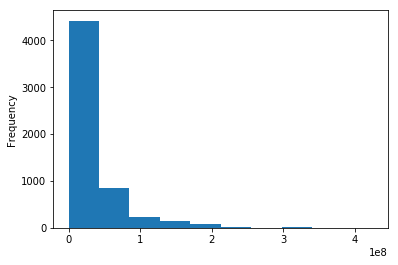

In [342]:
movies['production_budget'].plot(kind = 'hist')

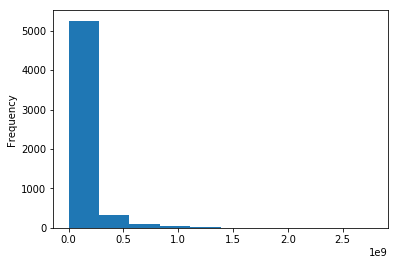

In [343]:
movies['worldwide_gross'].plot(kind = 'hist')

In [312]:
#can we fill in missing information using another dataset?

In [149]:
df.shape

(606648, 6)

In [150]:
df_budgets['worldwide_gross'] = df_budgets['worldwide_gross'].str.replace('$', '')
df_budgets['worldwide_gross'] = df_budgets['worldwide_gross'].str.replace(',','')

In [153]:
df_budgets['domestic_gross'] = df_budgets['domestic_gross'].str.replace('$', '')
df_budgets['domestic_gross'] = df_budgets['domestic_gross'].str.replace(',','')

In [154]:
df_budgets['production_budget'] = df_budgets['production_budget'].str.replace('$', '')
df_budgets['production_budget'] = df_budgets['production_budget'].str.replace(',','')

In [162]:
df_budgets['worldwide_gross'].dtype(int)

TypeError: 'numpy.dtype' object is not callable

In [157]:
df_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.1+ KB
